In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
!pip install matplotlib

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Use yfinance to extract stock data for META

In [6]:
Meta = yf.Ticker("META")

In [7]:
meta_stock_data = Meta.history(period="max")

In [8]:
meta_stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,41.889981,44.828756,37.855394,38.084518,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.390988,36.520494,32.874422,33.900501,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.485906,33.462177,30.822261,30.882032,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.250625,32.376325,31.240663,31.878227,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.824615,33.083624,31.649105,32.904308,50237200,0.0,0.0


In [9]:
meta_stock_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

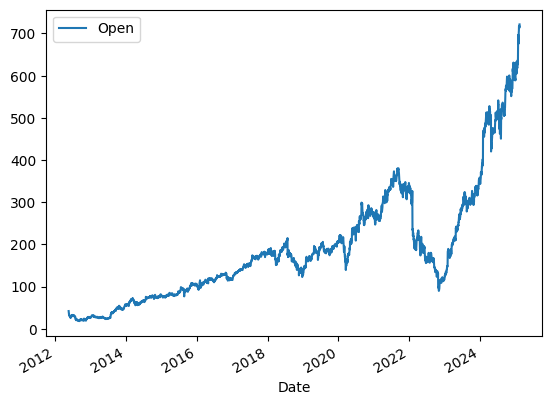

In [10]:
meta_stock_data.plot(x="Date", y="Open")

## Use Webscraping to Extract Tesla Revenue Data

In [11]:
# URL of the page
url = "https://www.macrotrends.net/stocks/charts/META/meta-platforms/revenue"

# Headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Send a GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, "html.parser")

    # Example: Find the revenue table (you need to inspect the page's HTML structure)
    table = soup.find("table")  # Adjust the tag and class if needed
    if table:
        print("Table found:")
        print(table.prettify())
    else:
        print("Table not found. The content may be loaded via JavaScript.")
else:
    print(f"Failed to load page, status code: {response.status_code}")


Table found:
<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Meta Platforms Annual Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2024
   </td>
   <td style="text-align:center">
    $164,501
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2023
   </td>
   <td style="text-align:center">
    $134,902
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022
   </td>
   <td style="text-align:center">
    $116,609
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021
   </td>
   <td style="text-align:center">
    $117,929
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2020
   </td>
   <td style="text-align:center">
    $85,965
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2019
   </td>
   <td style="text-align:center">
    $70,697
   </td>
  

In [12]:
try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Check if the request was successful (status code 200)
    html_data = response.text  # Get the HTML content
    print(html_data)  # Print the HTML
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")  # Print the error


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/META/meta-platforms/revenue" />
		<link rel="alternate" media="only screen and (max-width: 768px)" href="https://m.macrotrends.net/stocks/charts/META/meta-platforms/revenue">
		<title>Meta Platforms Revenue 2010-2024 | META | MacroTrends</title>
		<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png">
		<meta name="description" content="Meta Platforms annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company 

In [13]:
soup = BeautifulSoup(html_data, 'html.parser')

In [14]:
meta_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [15]:
# First, isolate the body of the table which contains all the information
# Then, loop through each row and find all the column values for each row
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

# Append the data of each row to the dataFrame
    meta_revenue = pd.concat([meta_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)


In [16]:
meta_revenue["Revenue"] = meta_revenue["Revenue"].str.replace(r'[\$,]', '', regex=True)

In [17]:
meta_revenue.dropna(inplace=True)

meta_revenue = meta_revenue[meta_revenue['Revenue'] != ""]

In [18]:
meta_revenue.head()

,Date,Revenue
0,2024-12-31,48386
1,2024-09-30,40589
2,2024-06-30,39071
3,2024-03-31,36455
4,2023-12-31,40112


In [19]:
make_graph(meta_stock_data, meta_revenue, 'META')

<ipython-input-5-fa843a421e2e>:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

<ipython-input-5-fa843a421e2e>:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

